In [25]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
pip install selenium


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import time
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import re
from urllib.parse import quote
import pandas as pd

In [5]:
def get_search_results(search_engine_name, search_engine_url, search_phrase):
    # Construct the search URL
    search_url = search_engine_url + quote(search_phrase)
    
    # Set Chrome options for headless browsing
    chrome_options = Options()
    chrome_options.add_argument("--headless")
    chrome_options.add_argument("--incognito")
    chrome_options.add_argument("--disable-blink-features=AutomationControlled")
    chrome_options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36")

    
    # Launch the Chrome browser
    driver = webdriver.Chrome(options=chrome_options)
    driver.get(search_url)
    time.sleep(7)  # Allow time for the page to load
    
    # Retrieve updated URL and page source
    updated_url = driver.current_url
    html = driver.page_source
    driver.quit()
    
    # Parse the page with BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')
    results = []
    results_info = []  # Initialize results_info
    
    # Extract search results for Yahoo
    if search_engine_name == "Yahoo":
        results = soup.find_all('div', class_='algo-sr')
    elif search_engine_name == "DuckDuckGo":
        results = soup.find_all('a', class_="result__a")
    elif search_engine_name == "Bing":
        results = soup.find_all('li', class_='b_algo')
    elif search_engine_name == "Google":
        results = soup.find_all('div', class_='g')
    
    # Process the results
    for result in results:
        title = ""
        link = ""
        try:
            title_container = None
            if search_engine_name == "Yahoo":
                title_container = result.find('a')
                link_container = result.find('a')
                if title_container:
                    title = ''.join(title_container.find_all(string=True, recursive=True))
                if link_container:
                    link = link_container['href']
            elif search_engine_name == "DuckDuckGo":
                title_container = result.find('h2').find('a').find('span')
                link_container = result.find('a', class_="Rn_JXVtoPVAFyGkcaXyK")
                if title_container:
                    title = ''.join(title_container.find_all(string=True, recursive=True))
                if link_container:
                    link = link_container['href']
            elif search_engine_name == "Bing":
                title_container = result.find('h2').find('a')
                link_container = result.find('h2').find('a')
                if title_container:
                    title = ''.join(title_container.find_all(string=True, recursive=True))
                if link_container:
                    link = link_container['href']
            elif search_engine_name == "Google":
                title_container = result.find('h3')
                link_container = result.find('a')
                if title_container:
                    title = title_container.text
                if link_container:
                    link = link_container['href']
        except Exception as e:
            print(f"Error processing result: {e}")
            continue
        
        results_info.append({"title": title, "link": link})
    
    # Extract visible text and all links from the page
    visible_eng_text = soup.get_text(separator=' ')
    visible_eng_text = re.sub(r'[^\x00-\x7F]+', ' ', visible_eng_text)
    visible_eng_text = re.sub(r'\n', ' ', visible_eng_text)
    visible_eng_text = re.sub(r'\s+', ' ', visible_eng_text)

    all_links = [link.get('href') for link in soup.find_all('a') if link.get('href')]

    # Create the final dictionary
    search_info = {
        "search_engine": search_engine_name,
        "search_phrase": search_phrase,
        "search_url": search_url,
        "updated_url": updated_url,
        "results": results_info,
        "visible_eng_text": visible_eng_text,
        "all_links": all_links
    }
    
    return search_info


In [6]:
search_phrases = ["Trump and Israel"]
search_engine_urls = {
    "Yahoo": "https://in.search.yahoo.com/search?p=",
    "Bing": "https://www.bing.com/search?q=",
    "Google": "https://www.google.com/search?q="
}

all_results = []  # Collect all results from all search engines

for search_phrase in search_phrases:
    for search_engine_name, search_engine_url in search_engine_urls.items():
        # Call the function to get search results
        search_info = get_search_results(search_engine_name, search_engine_url, search_phrase)
        
        print(f"{search_engine_name} search for '{search_phrase}' returned {len(search_info['results'])} results\n")
        
        for result in search_info['results']:
            # Add the search phrase and search engine name to the result
            result['Search Phrase'] = search_phrase
            result['Search Engine'] = search_engine_name
            print(f"Title: {result['title']}")
            print(f"Link: {result['link']}")
            print()
        
        # Add search engine results to all_results
        all_results.extend(search_info['results'])

# Convert all results to a DataFrame
df = pd.DataFrame(all_results)

# Save to a CSV file with engines separated
csv_file = "search_results_separated3.csv"
df.to_csv(csv_file, index=False, encoding='utf-8')

print(f"Results saved to {csv_file}")


Yahoo search for 'Trump and Israel' returned 7 results

Title: www.aljazeera.com › news › 2025/1/22Why has US President Trump removed sanctions on Israeli ...
Link: https://www.aljazeera.com/news/2025/1/22/why-has-us-president-trump-removed-sanctions-on-israeli-settlers

Title: www.bbc.com › news › articlesIsrael has changed since Donald Trump's last term – has he?
Link: https://www.bbc.com/news/articles/cgkjxlml42vo

Title: www.ft.com › content › d4ff1e47-5ed0-4d5c-95a1-746beDonald Trump signals strong pro-Israel stance by lifting West ...
Link: https://www.ft.com/content/d4ff1e47-5ed0-4d5c-95a1-746be5779f36

Title: www.middleeasteye.net › news › donald-trump-middleWhere does Donald Trump stand on Israel, Palestine and the ...
Link: https://www.middleeasteye.net/news/donald-trump-middle-east-foreign-policy

Title: www.nbcnews.com › politics › donald-trumpTrump breaks silence on Israel's military campaign in Gaza ...
Link: https://www.nbcnews.com/politics/donald-trump/trump-israel-gaza

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


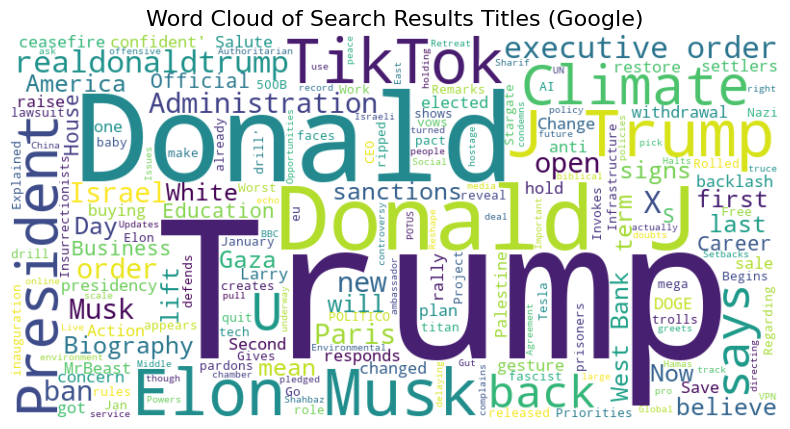

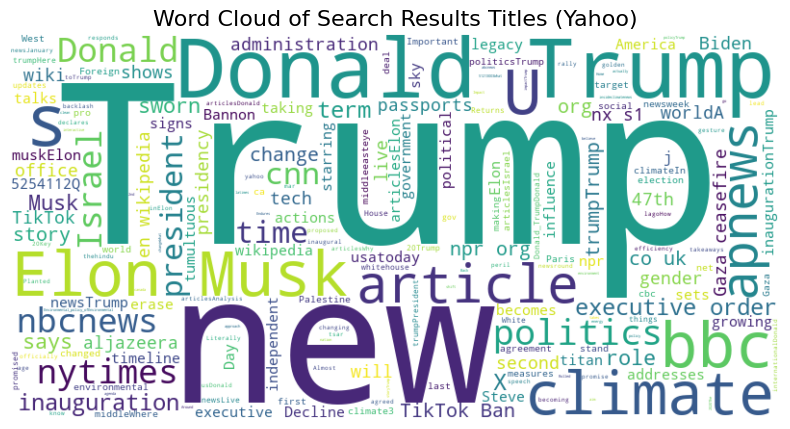

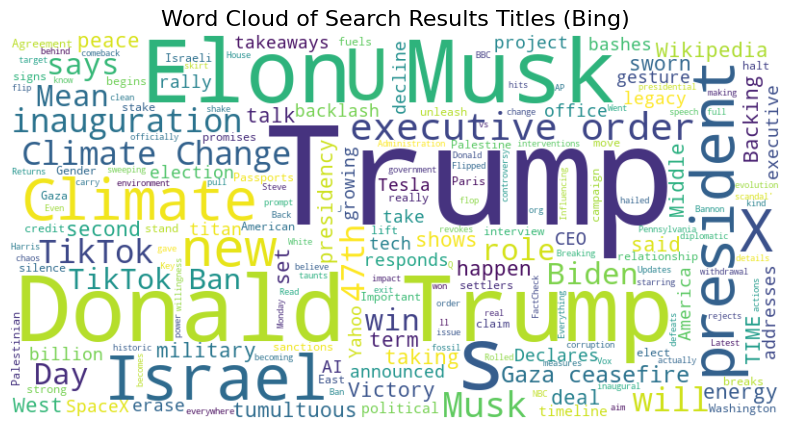

In [8]:
data0 = pd.read_csv(r"C:\Users\ASUS\Desktop\IIT K\6th Sem\CGS616\Assignment_1\search_results_google.csv")
data1 = pd.read_csv(r"C:\Users\ASUS\Desktop\IIT K\6th Sem\CGS616\Assignment_1\search_results_yahoo.csv")
data2 = pd.read_csv(r"C:\Users\ASUS\Desktop\IIT K\6th Sem\CGS616\Assignment_1\search_results_bing.csv")


# Combine all titles into a single string
text_data0 = " ".join(data0['title'].dropna().tolist())
text_data1 = " ".join(data1['title'].dropna().tolist())
text_data2 = " ".join(data2['title'].dropna().tolist())


# Generate the Word Cloud
wordcloud0 = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=200
).generate(text_data0)


wordcloud1 = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=200
).generate(text_data1)

wordcloud2 = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=200
).generate(text_data2)

# Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud0, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Search Results Titles (Google)", fontsize=16)
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Search Results Titles (Yahoo)", fontsize=16)
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Search Results Titles (Bing)", fontsize=16)
plt.show()

Sentimental Analysis on Title

In [9]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
from textblob import TextBlob

data = pd.read_csv(r'C:\Users\ASUS\Desktop\IIT K\6th Sem\CGS616\Assignment_1\search_results.csv')
# Function to calculate sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.polarity  # -1 (negative) to +1 (positive)
    subjectivity = analysis.subjectivity  # 0 (objective) to 1 (subjective)
    return pd.Series([polarity, subjectivity])

# Apply sentiment analysis to the 'Title' column
data[['Polarity', 'Subjectivity']] = data['title'].dropna().apply(get_sentiment)

# Save results with sentiment
sentiment_csv = "search_results_with_sentiment1.csv"
data.to_csv(sentiment_csv, index=False, encoding='utf-8')

print(f"Sentiment analysis completed and saved to {sentiment_csv}")


Sentiment analysis completed and saved to search_results_with_sentiment1.csv


In [14]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import seaborn as sns


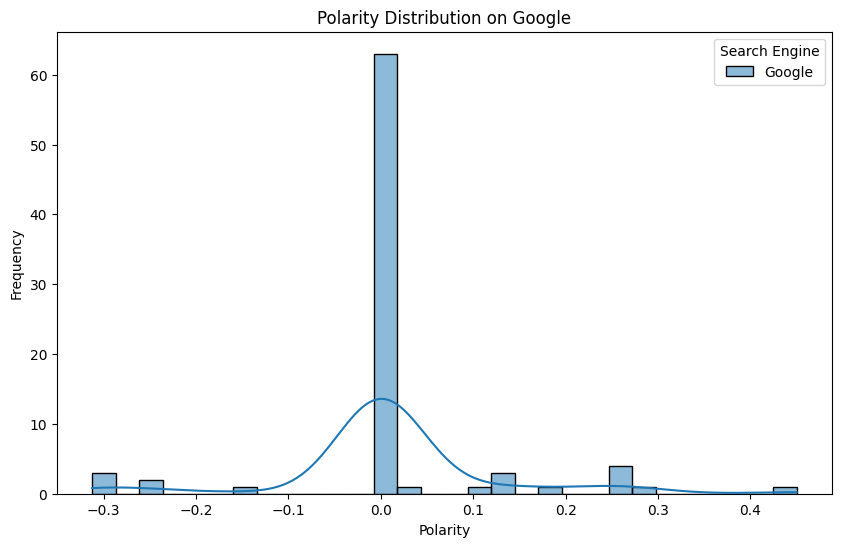

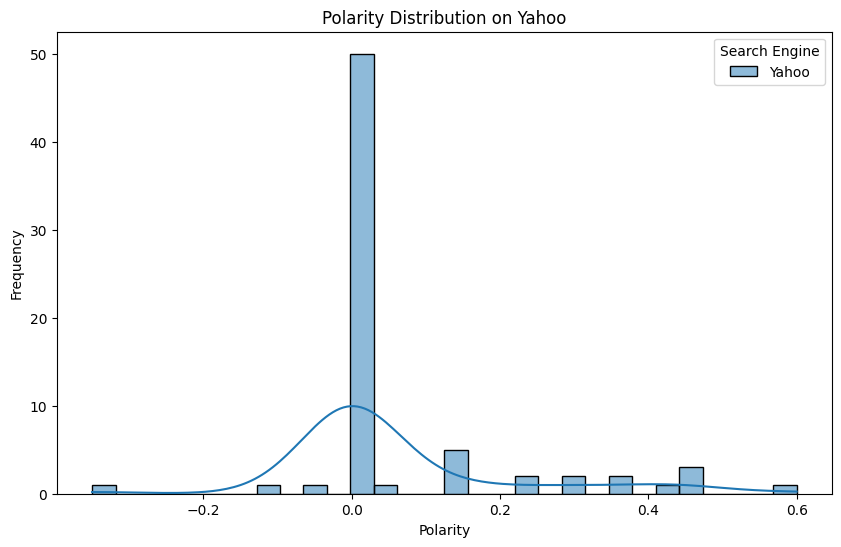

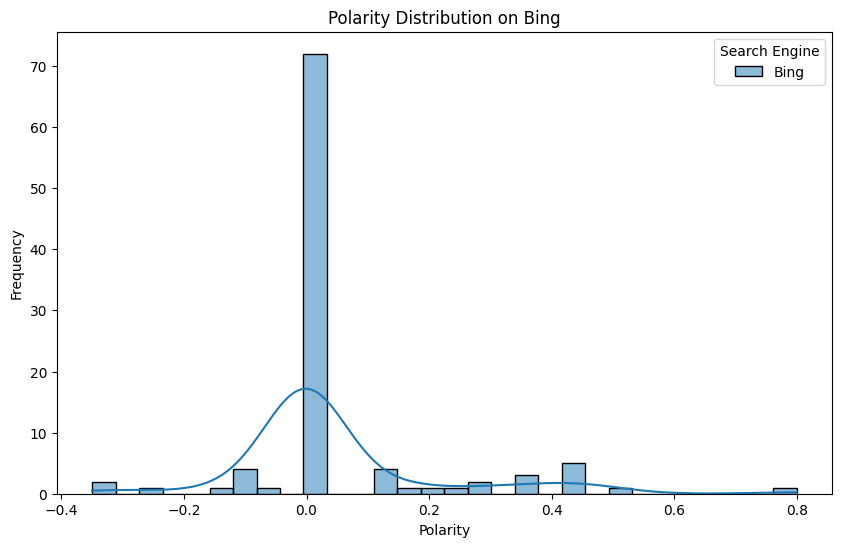

In [16]:
# Plot sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=data0, x="Polarity", hue="Search Engine", kde=True, bins=30)
plt.title("Polarity Distribution on Google")
plt.xlabel("Polarity")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=data1, x="Polarity", hue="Search Engine", kde=True, bins=30)
plt.title("Polarity Distribution on Yahoo")
plt.xlabel("Polarity")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=data2, x="Polarity", hue="Search Engine", kde=True, bins=30)
plt.title("Polarity Distribution on Bing")
plt.xlabel("Polarity")
plt.ylabel("Frequency")
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10220\377905924.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Search Engine", y="Subjectivity", palette="viridis")


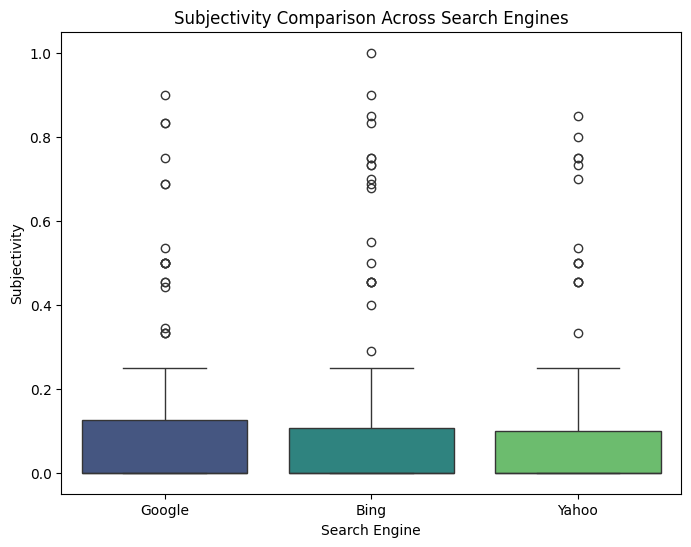

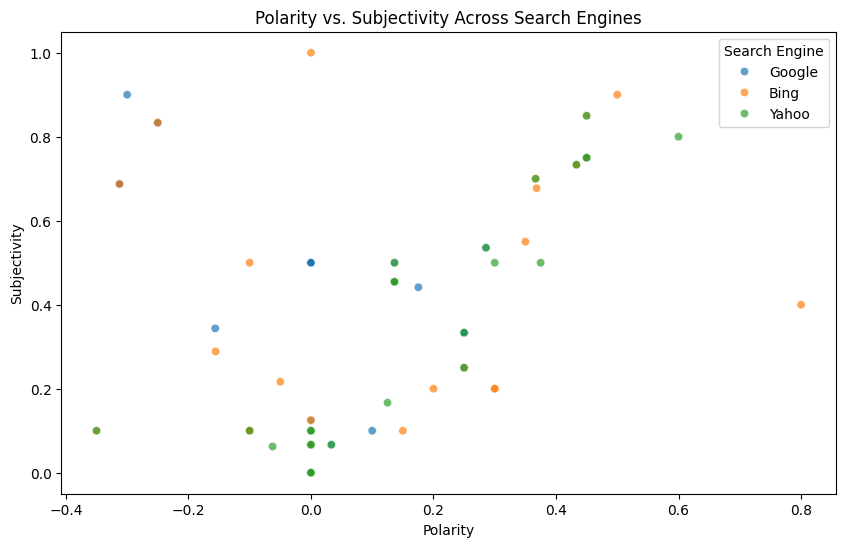

               Polarity  Subjectivity
Search Engine                        
Bing           0.048289      0.142302
Google         0.010768      0.139055
Yahoo          0.062886      0.135645


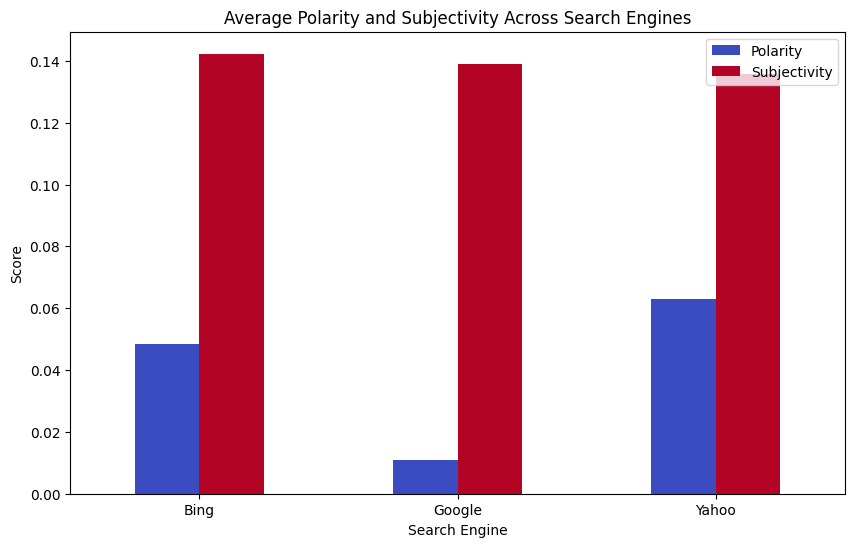

In [17]:
df = pd.read_csv(r'C:\Users\ASUS\Desktop\IIT K\6th Sem\CGS616\Assignment_1\search_results_with sentiments.csv')

# Box plot for subjectivity
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="Search Engine", y="Subjectivity", palette="viridis")
plt.title("Subjectivity Comparison Across Search Engines")
plt.xlabel("Search Engine")
plt.ylabel("Subjectivity")
plt.show()

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Polarity", y="Subjectivity", hue="Search Engine", alpha=0.7)
plt.title("Polarity vs. Subjectivity Across Search Engines")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

# Group by search engine and calculate averages
sentiment_summary = df.groupby('Search Engine')[['Polarity', 'Subjectivity']].mean()
print(sentiment_summary)

# Bar chart for averages
sentiment_summary.plot(kind='bar', figsize=(10, 6), colormap="coolwarm")
plt.title("Average Polarity and Subjectivity Across Search Engines")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()


CLUSTERING

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import seaborn as sns

# Load the datasets
google_data = pd.read_csv(r'C:\Users\ASUS\Desktop\IIT K\6th Sem\CGS616\Assignment_1\search_results_google.csv')
bing_data = pd.read_csv(r'C:\Users\ASUS\Desktop\IIT K\6th Sem\CGS616\Assignment_1\search_results_bing.csv')
yahoo_data = pd.read_csv(r'C:\Users\ASUS\Desktop\IIT K\6th Sem\CGS616\Assignment_1\search_results_yahoo.csv')

# A list of the data to iterate through
search_engines = {
    "Google": google_data,
    "Bing": bing_data,
    "Yahoo": yahoo_data
}

Preprocess Text and Apply TF-IDF

In [9]:
pip install umap

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3586 sha256=c5d2a3f91499021e7cac1f231b0cbf3977fe8c4721578d614291ca233536b794
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\48\4a\1c\1d511cbb0413a448d8546e958f8e82b98d9bb493038d19ece2
Successfully built umap
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import numpy as np
from sklearn.preprocessing import normalize
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA



Clustering results for Google

Visualizing clusters for Google


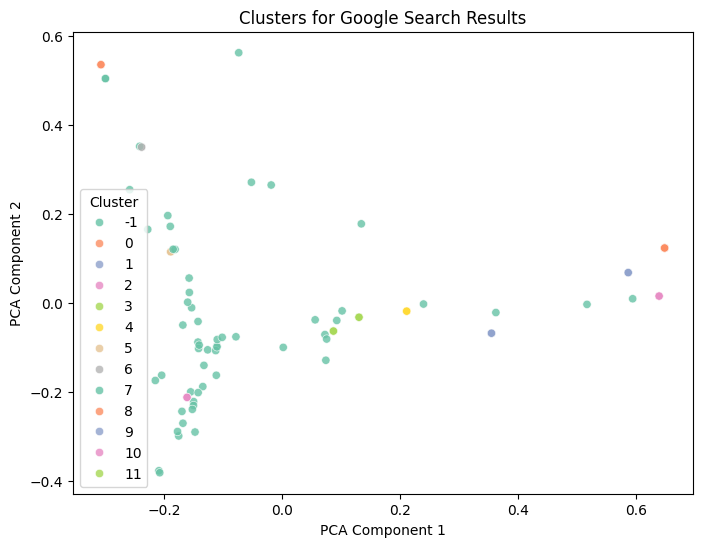


Clustering results for Bing

Visualizing clusters for Bing


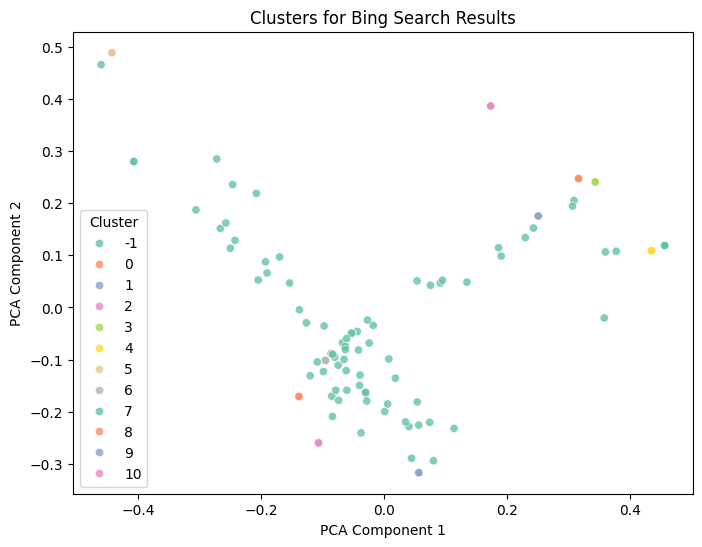


Clustering results for Yahoo

Visualizing clusters for Yahoo


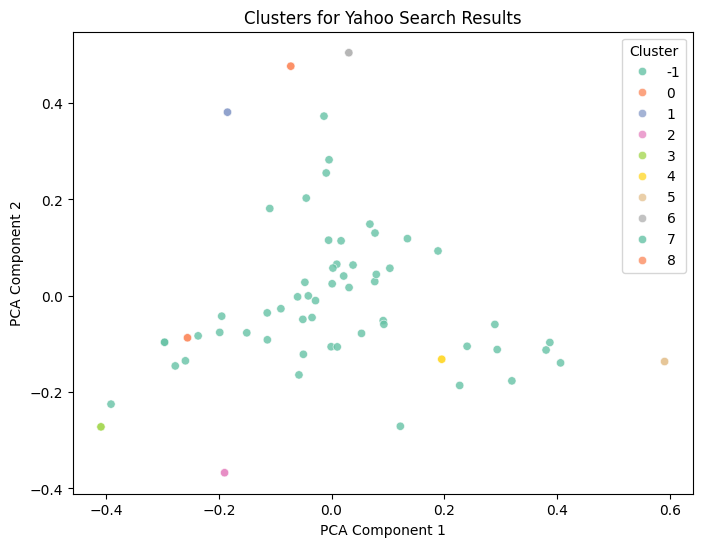

In [61]:


# Text preprocessing function
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = text.lower().strip()  # Lowercase and strip
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

# Apply text preprocessing and clustering for each search engine
for engine_name, data in search_engines.items():
    print(f"\nClustering results for {engine_name}")
    
    # Preprocess the text data
    data['Processed Title'] = data['title'].dropna().apply(preprocess_text)

    # Filter rows with non-empty processed titles
    filtered_data = data[data['Processed Title'] != ""]

    # TF-IDF Vectorization
    vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 1000 features
    tfidf_matrix = vectorizer.fit_transform(filtered_data['Processed Title'])
    
    # Normalize the data
    normalized_data = normalize(tfidf_matrix)

    # DBSCAN
    dbscan = DBSCAN(eps=0.2, min_samples=2)
    filtered_data['Cluster'] = dbscan.fit_predict(normalized_data)

    # Visualize clusters for each engine

    print(f"\nVisualizing clusters for {engine_name}")
    
    # Perform PCA for 2D visualization
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(normalized_data.toarray())
    
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x=reduced_data[:, 0],
        y=reduced_data[:, 1],
        hue=filtered_data['Cluster'],
        palette="Set2",
        alpha=0.8
    )
    plt.title(f"Clusters for {engine_name} Search Results")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend(title="Cluster")
    plt.show()    


    


Visualization For Google "Search Engine"